In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv('datasets.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1


In [33]:
df.shape

(20770, 22)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20770 non-null  float64
 1   name                            20770 non-null  object 
 2   host_id                         20770 non-null  int64  
 3   host_name                       20770 non-null  object 
 4   neighbourhood_group             20770 non-null  object 
 5   neighbourhood                   20763 non-null  object 
 6   latitude                        20763 non-null  float64
 7   longitude                       20763 non-null  float64
 8   room_type                       20763 non-null  object 
 9   price                           20736 non-null  float64
 10  minimum_nights                  20763 non-null  float64
 11  number_of_reviews               20763 non-null  float64
 12  last_review                     

In [55]:
df.isnull().sum()

id                                 0
name                               0
host_id                            0
host_name                          0
neighbourhood_group                0
neighbourhood                      7
latitude                           7
longitude                          7
room_type                          7
price                             34
minimum_nights                     7
number_of_reviews                  7
last_review                        7
reviews_per_month                  7
calculated_host_listings_count     7
availability_365                   7
number_of_reviews_ltm              7
license                            0
rating                             0
bedrooms                           0
beds                               0
baths                              0
dtype: int64

In [56]:
df.duplicated().sum()

12

In [57]:
df.dtypes

id                                float64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

In [58]:

# Drop rows missing key structural info
df = df.dropna(subset=["neighbourhood", "latitude", "longitude", "room_type"])

# Drop rows where price is missing (target variable for most analyses)
df = df.dropna(subset=["price"])



In [59]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

In [ ]:
# ID as integer
df["id"] = df["id"].astype("int64")



In [63]:
df['last_review'] = pd.to_datetime(df['last_review'],format="%d/%m/%y", errors='coerce')

In [72]:
# Convert rating to numeric (convert invalid strings to NaN)
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

# Fill missing ratings
df["rating"].fillna(df["rating"].median(), inplace=True)


C:\Users\khair\AppData\Local\Temp\ipykernel_20416\2142635063.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rating"].fillna(df["rating"].median(), inplace=True)


In [74]:
df['bedrooms'].value_counts()

bedrooms
1         13424
2          3598
Studio     1814
3          1393
4           345
5           112
6            29
7             9
9             6
8             4
15            1
14            1
Name: count, dtype: int64

In [75]:
# Bedrooms: convert 'Studio' -> 0, then numeric
df["bedrooms"] = df["bedrooms"].replace("Studio", 0)
df["bedrooms"] = pd.to_numeric(df["bedrooms"], errors="coerce")

In [76]:
df['bedrooms'].value_counts()

bedrooms
1     13424
2      3598
0      1814
3      1393
4       345
5       112
6        29
7         9
9         6
8         4
15        1
14        1
Name: count, dtype: int64

In [77]:
df["baths"] = pd.to_numeric(df["baths"], errors="coerce")


In [78]:
df["baths"].value_counts()

baths
1.0     16997
2.0      2079
1.5      1001
2.5       240
3.0       171
0.0        82
4.0        69
3.5        50
4.5        18
5.0         6
6.0         4
5.5         2
6.5         2
11.5        1
15.5        1
Name: count, dtype: int64

In [79]:
# Ensure numeric columns have correct type
numeric_cols = [
    "price", "minimum_nights", "number_of_reviews", "reviews_per_month",
    "calculated_host_listings_count", "availability_365",
    "number_of_reviews_ltm", "latitude", "longitude", "beds"
]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [80]:
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                    float64
minimum_nights                           float64
number_of_reviews                        float64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count           float64
availability_365                         float64
number_of_reviews_ltm                    float64
license                                   object
rating                                   float64
bedrooms                                   int64
beds                

In [83]:
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)
df["bedrooms"] = df["bedrooms"].fillna(df["bedrooms"].median())
df["baths"] = df["baths"].fillna(df["baths"].median())
df["rating"] = df["rating"].fillna(df["rating"].median())


In [86]:
df['license'].value_counts()

license
No License            17553
Exempt                 2133
OSE-STRREG-0000068       14
OSE-STRREG-0000437        6
OSE-STRREG-0008664        6
                      ...  
OSE-STRREG-0000105        1
OSE-STRREG-0000300        1
OSE-STRREG-0000782        1
OSE-STRREG-0000142        1
OSE-STRREG-0000513        1
Name: count, Length: 877, dtype: int64

In [87]:
df["license"] = df["license"].fillna("No License")


In [89]:

print("Shape after cleaning:", df.shape)
df.isnull().sum()

Shape after cleaning: (20736, 22)


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

In [107]:
# 1. Fix encoding
df["name"] = df["name"].str.encode("latin1", errors="ignore").str.decode("utf-8", errors="ignore")

# 2. Replace leftover symbols
df["name"] = (
    df["name"]
    .str.replace("Â", "", regex=False)
    .str.replace("â˜…", "★", regex=False)
    .str.replace("â€¢", "•", regex=False)
    .str.replace("â€“", "-", regex=False)
    .str.replace("â€”", "—", regex=False)
)


In [110]:
# Fix ID column scientific notation
df["id"] = df["id"].apply(lambda x: str(int(x)))
df["host_id"] = df["host_id"].apply(lambda x: str(int(x)))


In [109]:
df['name']

0                  Rental unit in Brooklyn  5.0  1 bedroom
1        Rental unit in New York  4.67  2 bedrooms  1 b...
2        Rental unit in New York  4.17  1 bedroom  2 be...
3        Rental unit in New York  4.64  1 bedroom  1 pr...
4           Condo in New York  4.91  Studio  1 bed  1 bath
                               ...                        
20765    Rental unit in New York  4.75  1 bedroom  1 be...
20766    Rental unit in New York  4.46  1 bedroom  2 be...
20767     Rental unit in New York  4.93  1 bedroom  1 bath
20768    Rental unit in New York  5.0  1 bedroom  1 bed...
20769    Rental unit in Queens  4.89  1 bedroom  1 bed ...
Name: name, Length: 20582, dtype: object

<Axes: ylabel='price'>

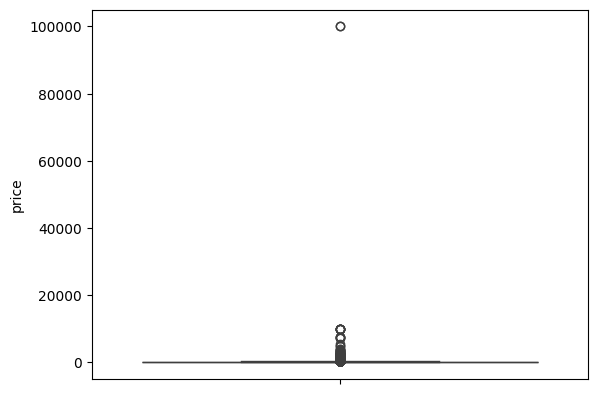

In [90]:
sns.boxplot(y=df["price"])


In [91]:
# Keep listings below 1500 USD (tunable)
df = df[df["price"] < 1500]

<Axes: ylabel='price'>

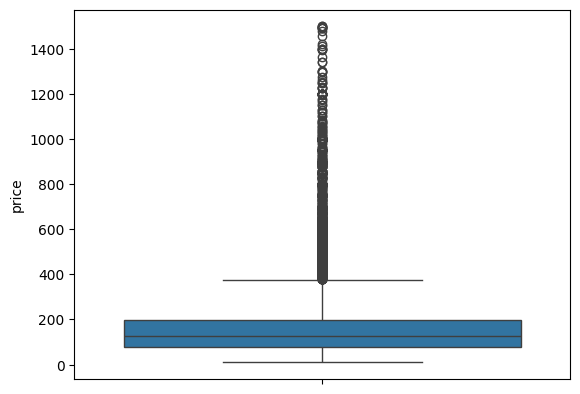

In [92]:
sns.boxplot(y=df["price"])


<Axes: ylabel='minimum_nights'>

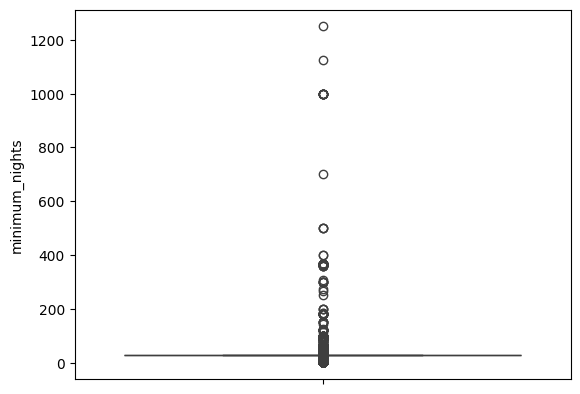

In [94]:
sns.boxplot(y=df["minimum_nights"])

In [95]:

# --- 3.2 Filter unrealistic minimum nights ---
df = df[df["minimum_nights"] < 365]

<Axes: ylabel='minimum_nights'>

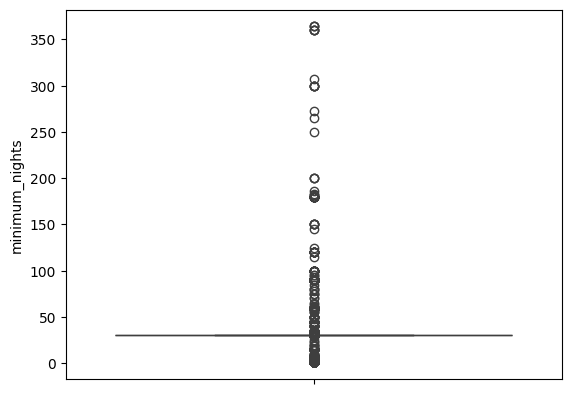

In [96]:
sns.boxplot(y=df["minimum_nights"])

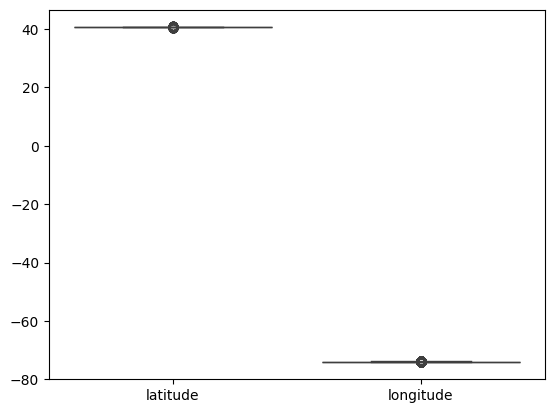

In [98]:
sns.boxplot(data=df[["latitude", "longitude"]])
plt.show()


In [99]:
# --- 3.3 Keep only valid NYC coordinate range ---
df = df[(df["latitude"] > 40) & (df["latitude"] < 41)]
df = df[(df["longitude"] > -74.3) & (df["longitude"] < -73.6)]

In [101]:
print("Shape after outlier filtering:", df.shape)


Shape after outlier filtering: (20582, 22)


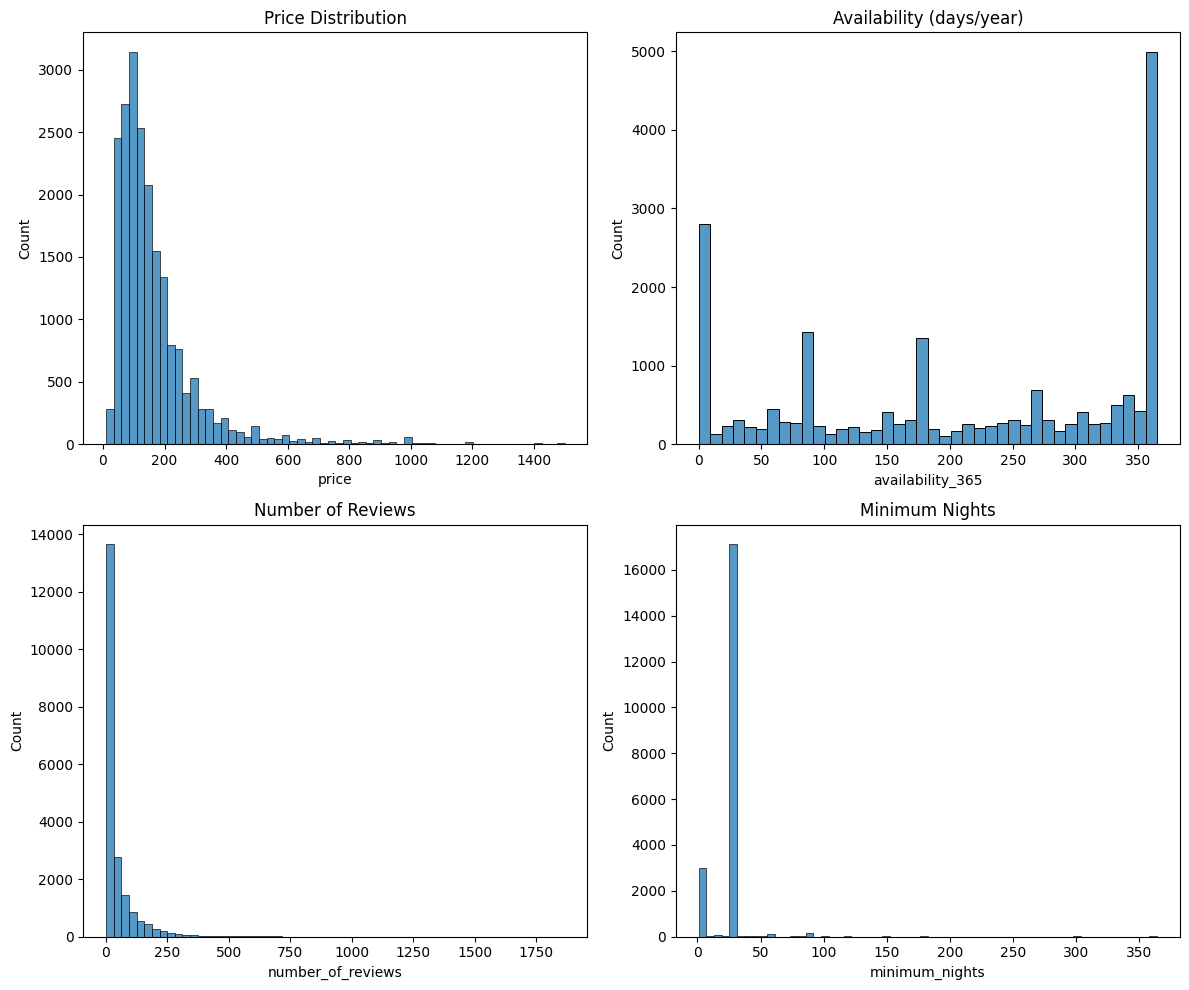

In [102]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Price distribution
sns.histplot(df["price"], bins=60, ax=axes[0,0])
axes[0,0].set_title("Price Distribution")

# Availability
sns.histplot(df["availability_365"], bins=40, ax=axes[0,1])
axes[0,1].set_title("Availability (days/year)")

# Number of reviews
sns.histplot(df["number_of_reviews"], bins=60, ax=axes[1,0])
axes[1,0].set_title("Number of Reviews")

# Minimum nights
sns.histplot(df["minimum_nights"], bins=60, ax=axes[1,1])
axes[1,1].set_title("Minimum Nights")

plt.tight_layout()
plt.show()

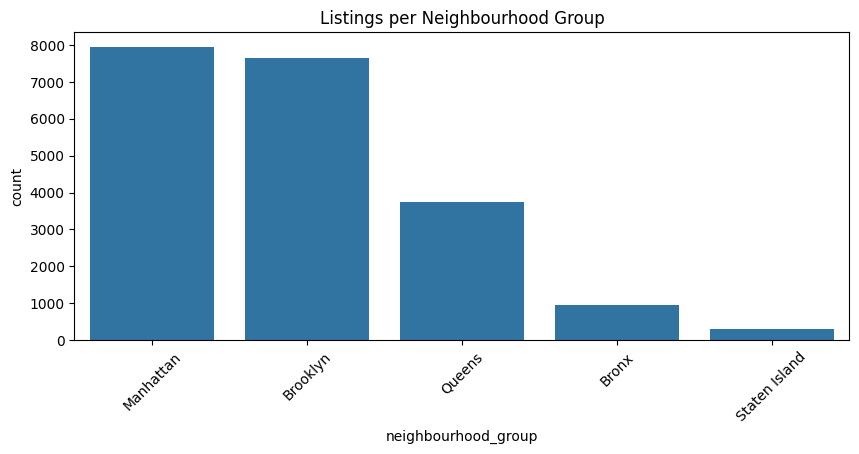

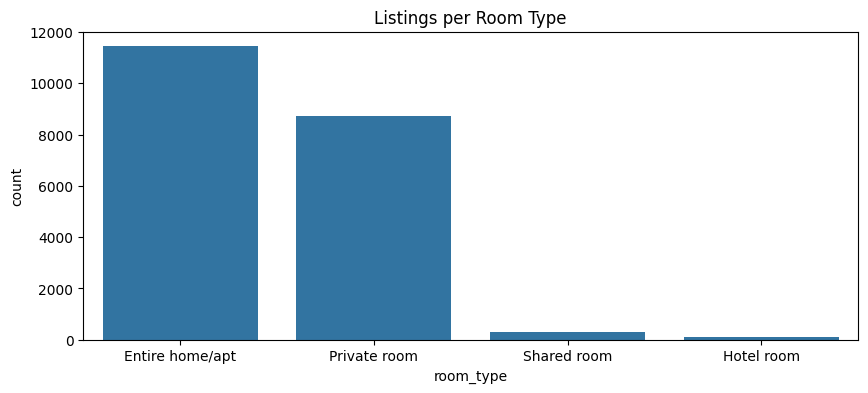

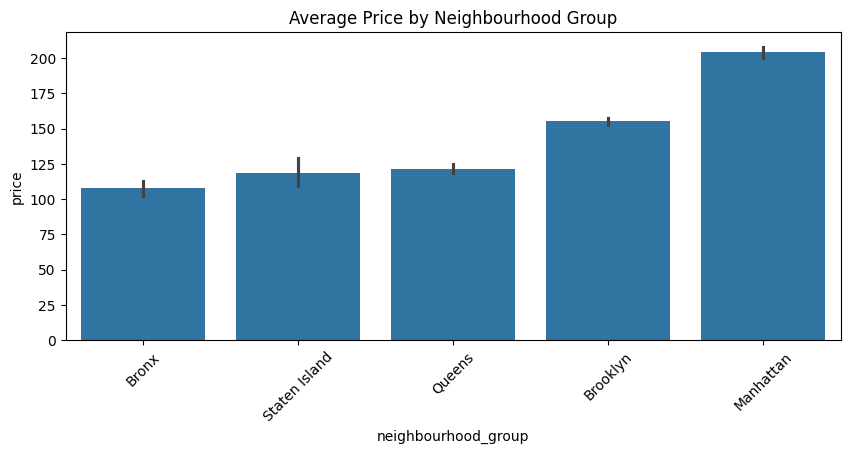

In [103]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x="neighbourhood_group", order=df["neighbourhood_group"].value_counts().index)
plt.title("Listings per Neighbourhood Group")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(data=df, x="room_type", order=df["room_type"].value_counts().index)
plt.title("Listings per Room Type")
plt.show()

plt.figure(figsize=(10,4))
sns.barplot(
    data=df,
    x="neighbourhood_group",
    y="price",
    order=df.groupby("neighbourhood_group")["price"].mean().sort_values().index
)
plt.title("Average Price by Neighbourhood Group")
plt.xticks(rotation=45)
plt.show()

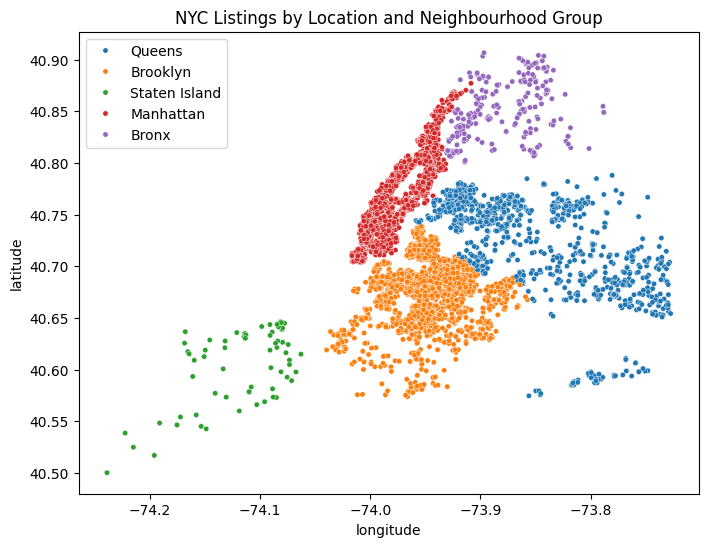

In [104]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df.sample(min(5000, len(df)), random_state=42),
    x="longitude", y="latitude", hue="neighbourhood_group", s=15
)
plt.title("NYC Listings by Location and Neighbourhood Group")
plt.legend(loc="best")
plt.show()

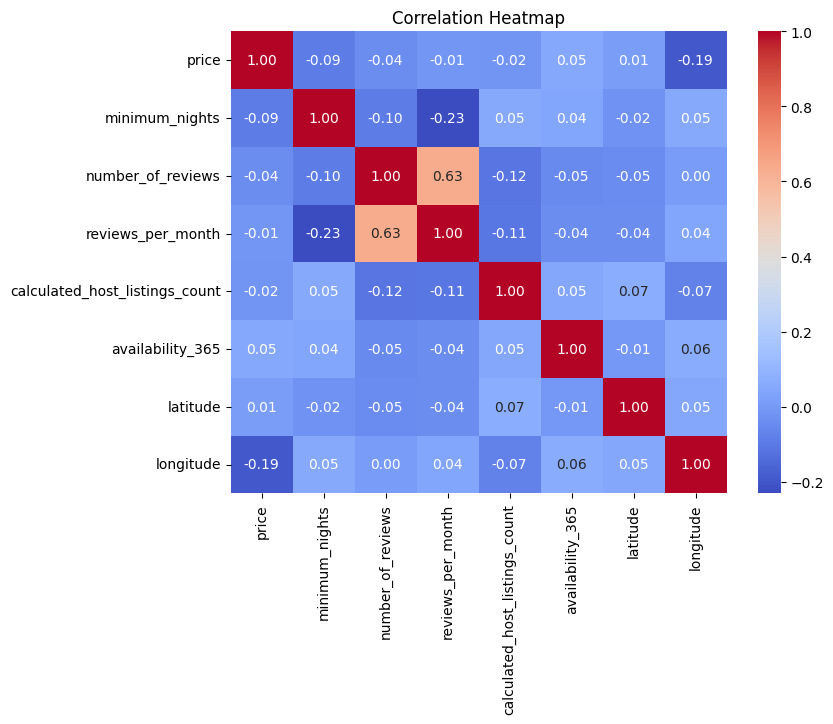

In [105]:
corr_cols = [
    "price", "minimum_nights", "number_of_reviews",
    "reviews_per_month", "calculated_host_listings_count",
    "availability_365", "latitude", "longitude"
]
corr = df[corr_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [115]:
df.to_csv("datasetsnew_cleaned.csv", index=False)
print("Cleaned dataset saved as datasets_cleaned.csv")

Cleaned dataset saved as datasets_cleaned.csv
